# Myth: 7 repetitions usually suffice to remember information for life

Source: https://open.substack.com/pub/astralcodexten/p/a-theoretical-case-against-education?r=2w91d0&selection=076938bb-510c-4829-b164-29f1a2b30834

Truth: for an average Anki user, 7 repetitions with given schedules will result in ~61% recall rate after 1 year.

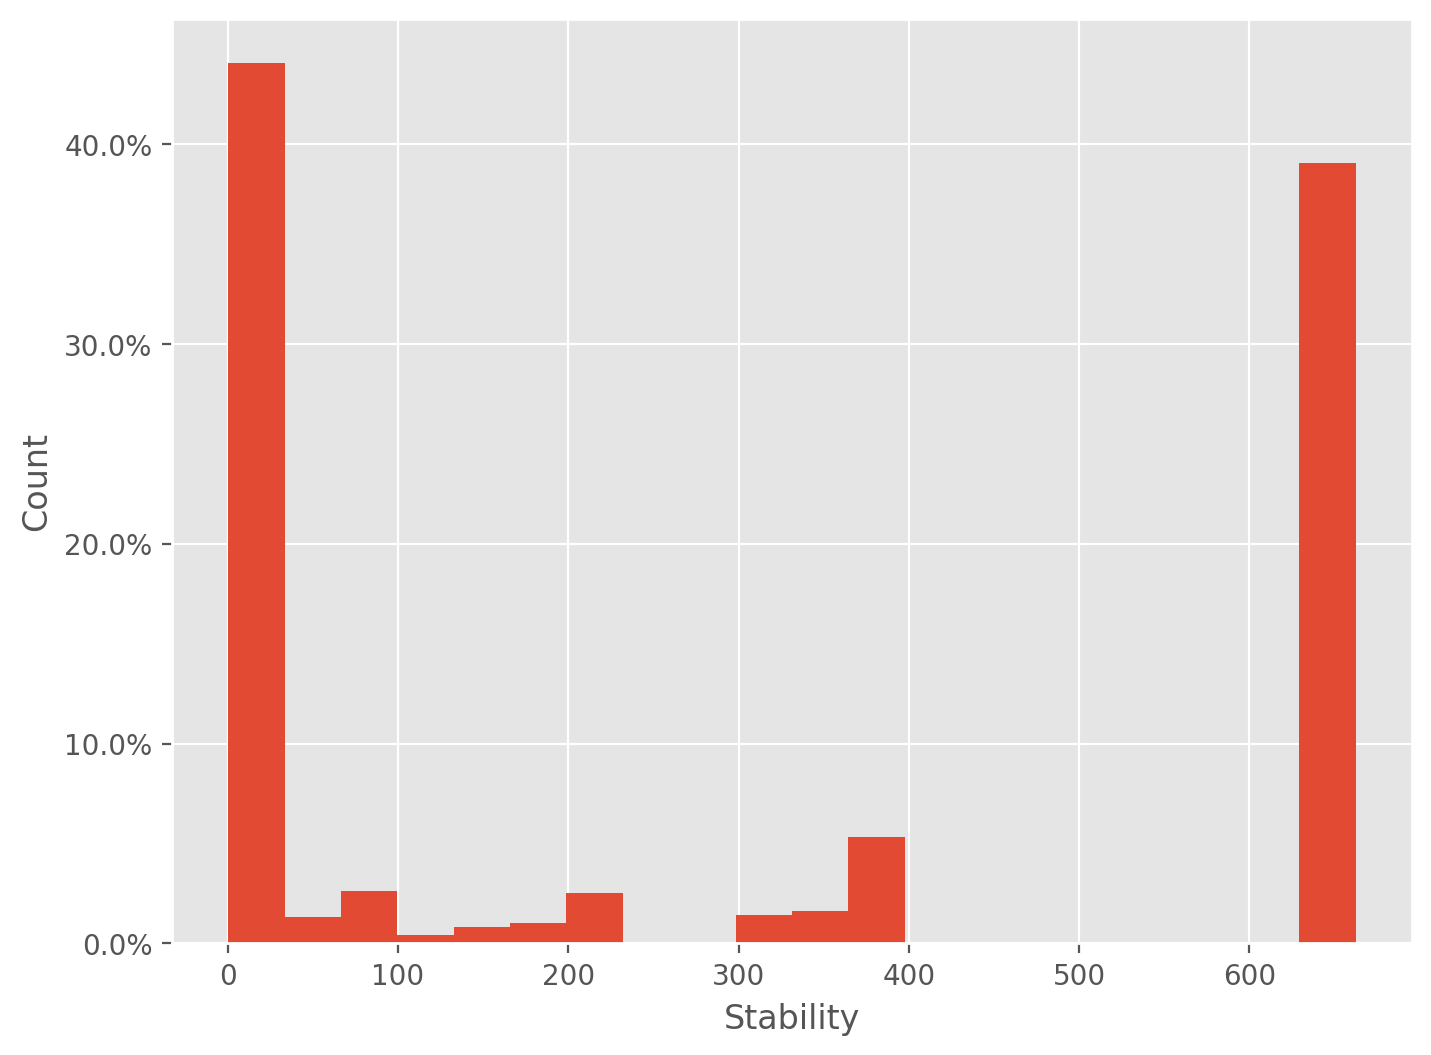

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from fsrs_optimizer import Collection, DEFAULT_WEIGHT, power_forgetting_curve

random.seed(42)
plt.style.use("ggplot")
col = Collection(DEFAULT_WEIGHT)
schedules = [1, 6, 14, 30, 66, 150, 360]

final_stabilities = []

for _ in range(1, 1000):
    rating_history = "1"
    interval_history = "0"
    stability = float(col.predict(interval_history, rating_history)[0])
    for interval in schedules:
        p_recall = power_forgetting_curve(interval, stability)
        if random.random() < p_recall:
            rating_history += ",3"
        else:
            rating_history += ",1"
        interval_history += f",{interval}"
        stability = float(col.predict(interval_history, rating_history)[0])

    final_stabilities.append(stability)

plt.figure(figsize=(8, 6), dpi=200)
plt.hist(
    final_stabilities,
    bins=20,
    weights=np.ones(len(final_stabilities)) / len(final_stabilities),
)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel("Stability")
plt.ylabel("Count")
plt.savefig("stability_histogram.png")
plt.show()

Average probability of recall after 365 days: 0.61


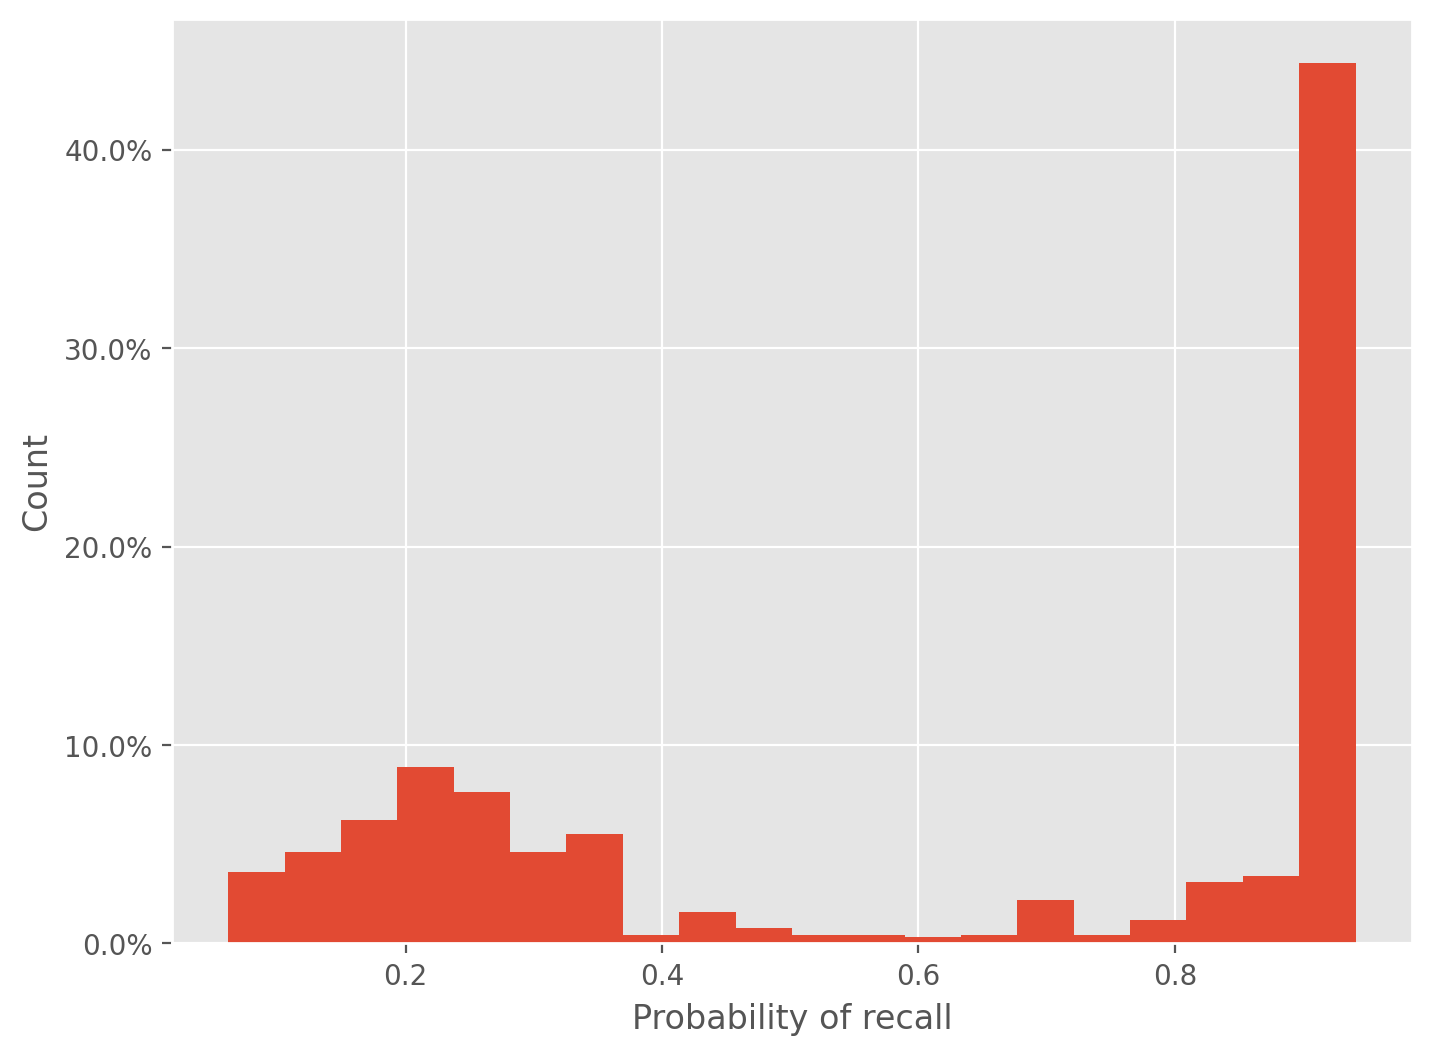

In [2]:
test_interval = 365

test_p_recall = power_forgetting_curve(test_interval, np.array(final_stabilities))
average_p_recall = np.mean(test_p_recall)
print(
    f"Average probability of recall after {test_interval} days: {average_p_recall:.2f}"
)

plt.figure(figsize=(8, 6), dpi=200)
plt.hist(
    test_p_recall, bins=20, weights=np.ones(len(test_p_recall)) / len(test_p_recall)
)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel("Probability of recall")
plt.ylabel("Count")
plt.savefig("recall_probability_histogram.png")
plt.show()